In [1]:
from autogluon.tabular import TabularPredictor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from getS50 import getS50
import uproot
import os

In [2]:
data = np.load("/home2/hky/github/Gamma_Energy/AllSky_withCR/Data/Crab_Dec_test.npz")
data = {key:data[key] for key in data}

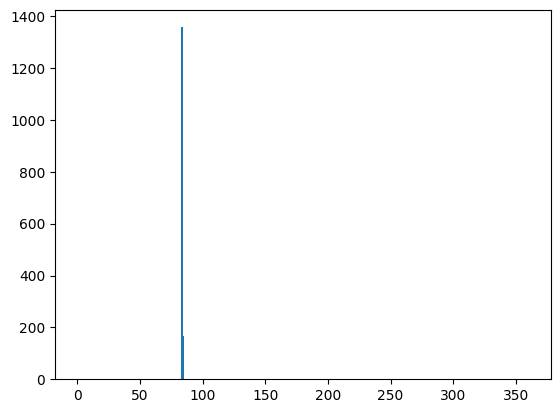

: 

In [8]:
plt.hist(data["Ra"][data["isgamma"]==1],bins=np.linspace(0,360,361))
plt.show()

In [13]:
paralist_MC = [
    "nch",
    "theta",
    "phi",
    "sigma",
    "cx",
    "cy",
    "sumpf",
    "summd",
    "mr1",
    "ne",
    "age",
    "inout",
    "prie"
]


In [14]:
gammafile = uproot.open("/home2/chenxu/data/gamma.00339651.root")
gammadata = gammafile["asresult"].arrays(paralist_MC, library="np")


In [15]:
gammadata["S50"] = getS50(gammadata["ne"], gammadata["age"])
MCcut = np.where(
    (gammadata["inout"] == 1)
    & (gammadata["age"] < 1.3)
    & (gammadata["age"] > 0.31)
    & (gammadata["S50"] >= 10**-1.2)
    & (gammadata["nch"] >= 16)
    & (gammadata["theta"] < 60)
)
gammadata = {key: gammadata[key][MCcut] for key in gammadata.keys()}

In [16]:
predictor_isgmma = TabularPredictor.load(
    "/home2/hky/github/Gamma_Energy/AllSky_withCR/agmodel/identitfy_gamma_CR_Allsky"
)

In [17]:
gammadata["isgamma"] = predictor_isgmma.predict_proba(pd.DataFrame(gammadata))[1].to_numpy()


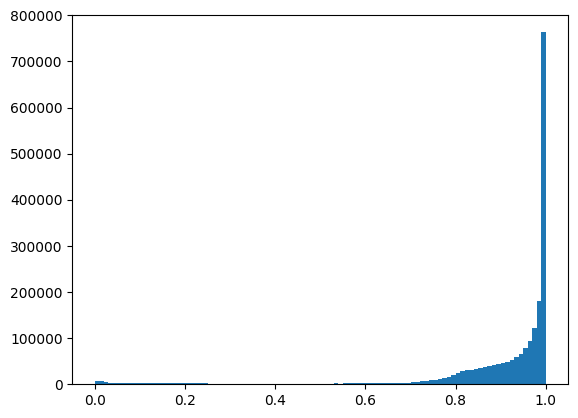

In [18]:
plt.hist(gammadata["isgamma"],bins=100)
plt.show()

In [27]:
np.sum(gammadata["isgamma"]>0.6)/len(gammadata["isgamma"])

0.9415842838255114

In [29]:
1-np.sum(Exptdata["isgamma"]>0.6)/len(Exptdata["isgamma"])

0.9960972603794901

In [20]:
Exptdata = np.load("/home2/hky/github/Gamma_Energy/Exptdata/crabCut_23_05_01/003960/00339651.npz")

In [21]:
Exptdata = {key:Exptdata[key] for key in Exptdata}
Exptdata["isgamma"] = predictor_isgmma.predict_proba(pd.DataFrame(Exptdata))[1].to_numpy()


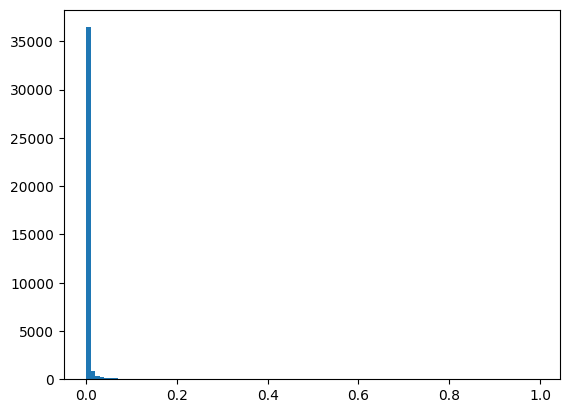

In [22]:
plt.hist(Exptdata["isgamma"],bins=100)
plt.show()

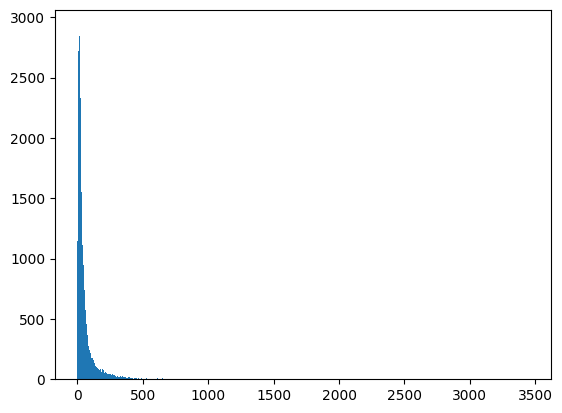

In [16]:
plt.hist(Exptdata["summd"],bins=1000)
plt.show()

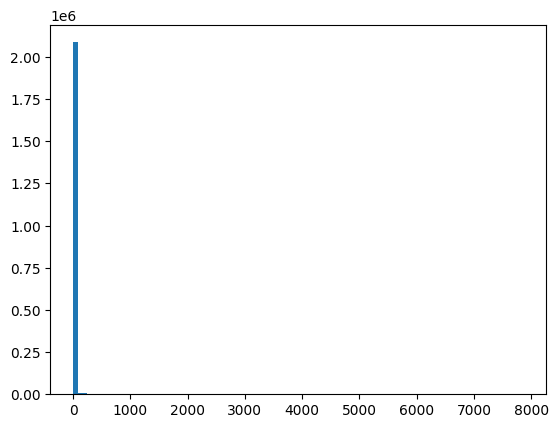

In [21]:
plt.hist(gammadata["summd"],bins=100)
plt.show()

In [2]:
data = np.load("/home2/hky/github/Gamma_Energy/AllSky_withCR/Data/Data_1000.npz")

In [3]:
data ={key:data[key] for key in data}

In [30]:
data["logsummd"] = data["summd"]
data["logsummd"][data["logsummd"] == 0] = 10**-0.8
data["logsummd"] = np.log10(data["logsummd"])
data["logsumpf"] = np.log10(data["sumpf"])

gammadata["logsummd"] = gammadata["summd"]
gammadata["logsummd"][gammadata["logsummd"] == 0] = 10**-0.8
gammadata["logsummd"] = np.log10(gammadata["logsummd"])
gammadata["logsumpf"] = np.log10(gammadata["sumpf"])

In [35]:
xedges = np.linspace(1,5,81)
yedges = np.linspace(-1,4,101)
H_expt, xedges, yedges = np.histogram2d(data["logsumpf"] , data["logsummd"],bins=(xedges, yedges))
H_MC, xedges, yedges = np.histogram2d(gammadata["logsumpf"] , gammadata["logsummd"],bins=(xedges, yedges))
H_expt = H_expt.T
H_MC = H_MC.T

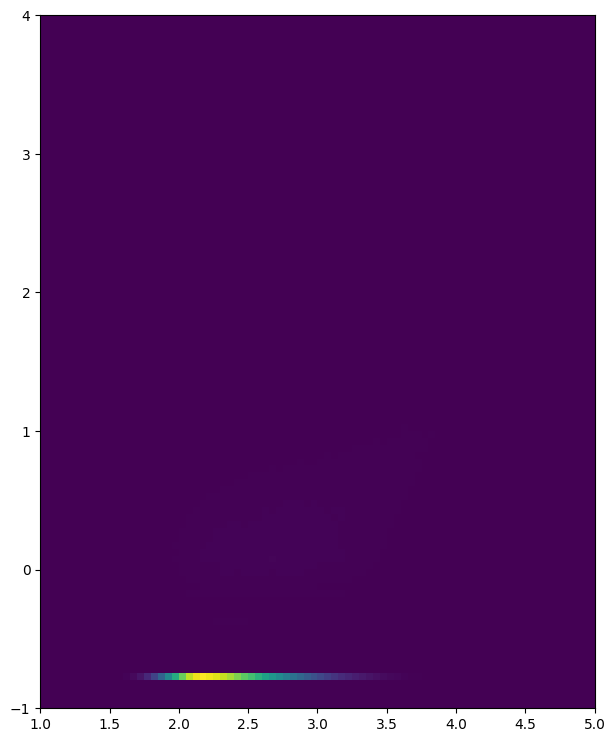

In [37]:

fig = plt.figure(figsize=(16, 9))
plt.imshow(H_MC, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

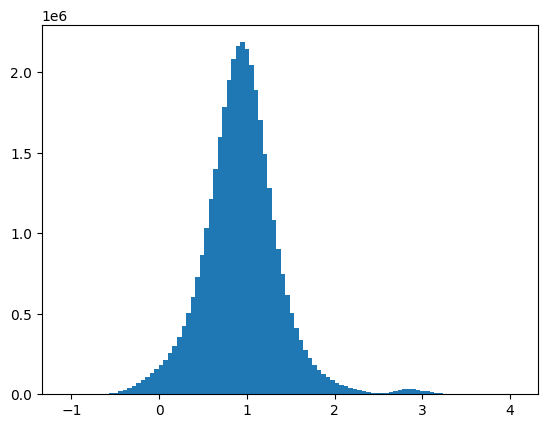

In [19]:
plt.hist(data["logsumpf"]-data["logsummd"],bins=100)
plt.show()

In [42]:
data = np.load("/home2/hky/github/Gamma_Energy/Exptdata/mergedData_nearcrab.npz")

In [43]:
for i in data:
    print(i)

runno
evno
mode
mjd
nch
oldtrig
theta
phi
evenodd
sigma
cx
cy
sumpf
summd
mr1
ne
age
ndf
chi2
Ra
Dec
ha
LST
S50


In [44]:
data={key:data[key] for key in data}

In [45]:
data["logsummd"] = data["summd"]
data["logsummd"][data["logsummd"] == 0] = 10**-0.8
data["logsummd"] = np.log10(data["logsummd"])
data["logsumpf"] = np.log10(data["sumpf"])

In [46]:
xedges = np.linspace(1,5,81)
yedges = np.linspace(-1,4,101)
H_expt, xedges, yedges = np.histogram2d(data["logsumpf"] , data["logsummd"],bins=(xedges, yedges))
H_MC, xedges, yedges = np.histogram2d(gammadata["logsumpf"] , gammadata["logsummd"],bins=(xedges, yedges))
H_expt = H_expt.T
H_MC = H_MC.T

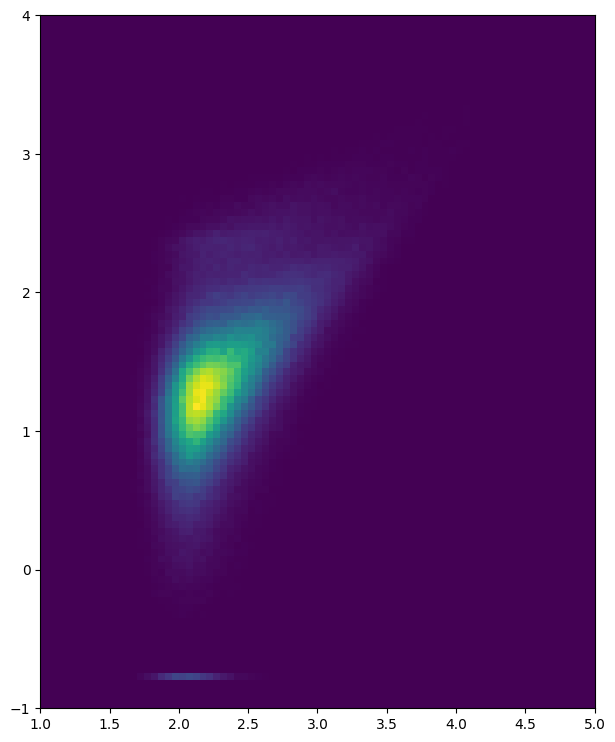

In [47]:

fig = plt.figure(figsize=(16, 9))
plt.imshow(H_expt, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

In [50]:
np.max(data["Dec"]),np.min(data["Dec"])

(22.99999729868587, 21.000007671192478)

In [1]:
import numpy as np
data = np.load("/home2/hky/github/Gamma_Energy/AllSky_withCR/Data/Crab_Dec.npz")
data = {key:data[key] for key in data}

In [2]:
import matplotlib.pyplot as plt

In [3]:
data["logsummd"] = data["summd"]
data["logsummd"][data["logsummd"] == 0] = 10**-0.8
data["logsummd"] = np.log10(data["logsummd"])
data["logsumpf"] = np.log10(data["sumpf"])

In [16]:
xedges = np.linspace(1,5,40)
yedges = np.linspace(-1,4,51)
H_expt, xedges, yedges = np.histogram2d(data["logsumpf"][data["isgamma"]==0] , data["logsummd"][data["isgamma"]==0],bins=(xedges, yedges))
H_MC, xedges, yedges = np.histogram2d(data["logsumpf"][data["isgamma"]==1] , data["logsummd"][data["isgamma"]==1],bins=(xedges, yedges))
H_expt = H_expt.T
H_MC = H_MC.T
H_expt/=np.sum(H_expt)
H_MC/=np.sum(H_MC)

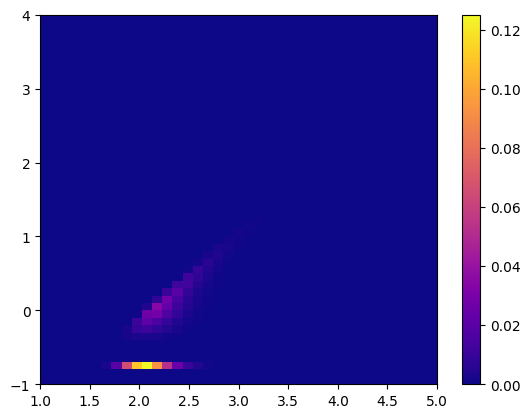

In [17]:

fig,ax = plt.subplots()
c = ax.pcolormesh(xedges, yedges, H_expt, cmap="plasma")
fig.colorbar(c, orientation="vertical")

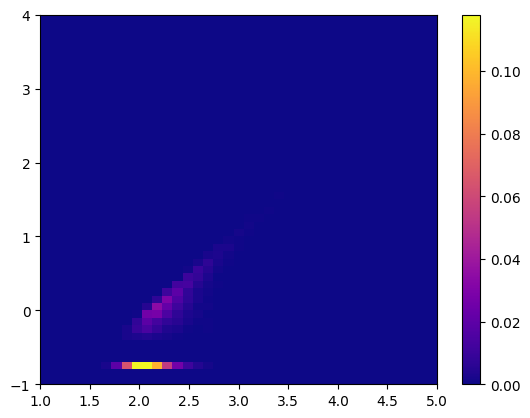

In [23]:

fig,ax = plt.subplots()
c = ax.pcolormesh(xedges, yedges, H_MC, cmap="plasma")
fig.colorbar(c, orientation="vertical")

In [19]:
np.sum(data["isgamma"]==0)

1057954

In [22]:
1/(np.sum(data["isgamma"]==1)/np.sum(data["isgamma"]==0))

158.92353913174102